# CNN model
implement the input pipeline of the CNN model and try to write/read tfrecord with the Oregon Wildlife dataset.

Description of Dataset:
1. The raw data is from [kaggle](https://www.kaggle.com/virtualdvid/oregon-wildlife), which consists of 20 class images of wildlife.
2. We have filtered the raw data. You need to download the filtered images from [here](https://drive.google.com/file/d/1HncttRdMHeNjde8xQCjQQtTLG8dcaTJx/view) and use them to complete the image classification task.
3. In the dataset we prepared for you, there are nearly 7,200 images, which contain 10 kinds of wildlife.

The sample image is shown below:
![](https://nthu-datalab.github.io/ml/labs/12-1_CNN/imgsrc/red_fox.png)


## Requirement:
* Write the training/testing datasets to tfrecord files.
* Read data from tfrecord files and preprocess them.
* After finishing the input pipeline mentioned above, you have to train the model for at least 5 epochs.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import IPython.display as display
import matplotlib.pyplot as plt
import pathlib
import random


In [2]:
# You need to download the prepared data and unzip the file in current path('./')
data_root = pathlib.Path('./oregon_wildlife')

# print the subfolders.
print('classes:')
for item in data_root.iterdir():
    print(item)
    
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
all_image_paths = shuffle(all_image_paths, random_state=1)
all_image_paths = [path for path in all_image_paths if path[-3:] not in ('gif','bmp')]
image_count = len(all_image_paths)
print('\ntotal img num:', image_count)


classes:
oregon_wildlife\bald_eagle
oregon_wildlife\black_bear
oregon_wildlife\cougar
oregon_wildlife\deer
oregon_wildlife\nutria
oregon_wildlife\raccoon
oregon_wildlife\raven
oregon_wildlife\red_fox
oregon_wildlife\sea_lions
oregon_wildlife\virginia_opossum

total img num: 7168


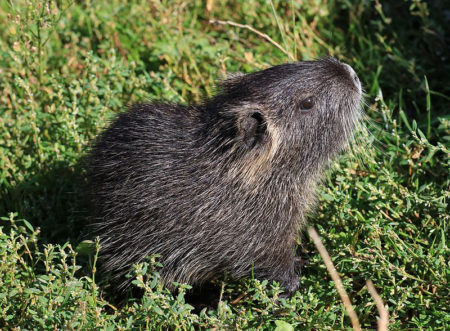

nutria


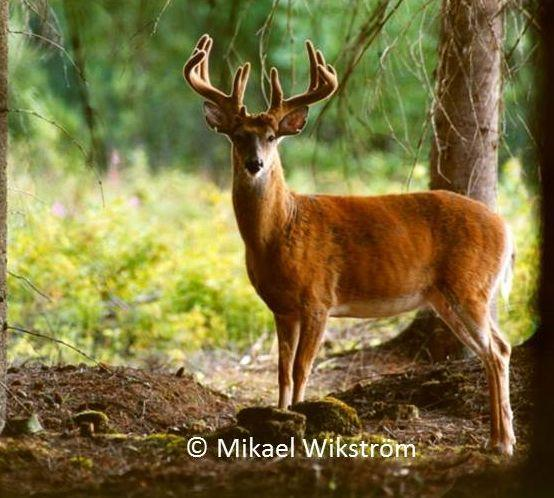

deer


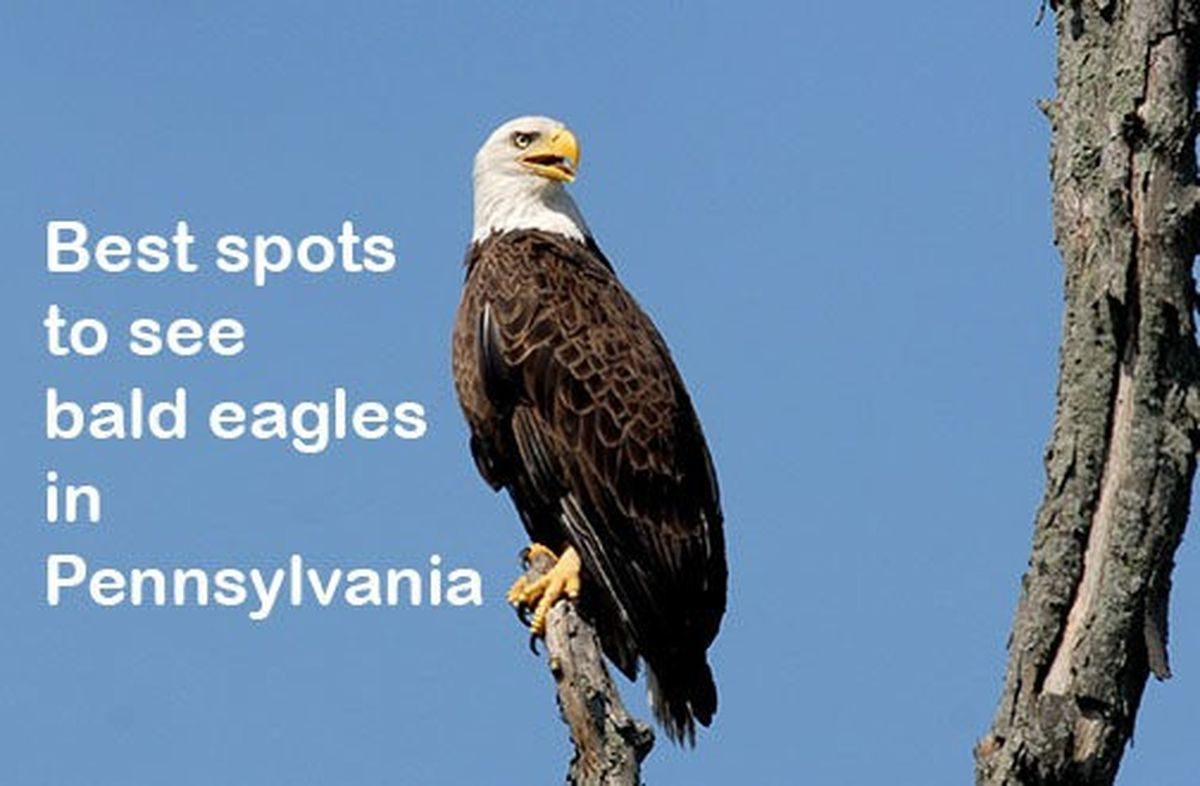

bald_eagle


In [3]:
# random showing 3 iamges for you
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path, width=200, height=200))
    print(image_path.split('\\')[-2])


In [3]:
# get the labels
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
# total labels
n_classes = len(label_names)
print(label_names)


['bald_eagle', 'black_bear', 'cougar', 'deer', 'nutria', 'raccoon', 'raven', 'red_fox', 'sea_lions', 'virginia_opossum']


In [4]:
# get the mapping dict
label_to_index = dict((name, index) for index,name in enumerate(label_names))
index_to_label = dict((index, name) for index,name in enumerate(label_names))
print(label_to_index)


{'bald_eagle': 0, 'black_bear': 1, 'cougar': 2, 'deer': 3, 'nutria': 4, 'raccoon': 5, 'raven': 6, 'red_fox': 7, 'sea_lions': 8, 'virginia_opossum': 9}


In [5]:
# get the label data
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]
print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [8, 5, 2, 5, 0, 2, 1, 0, 1, 0]


In [6]:
# Create training and validation sets using an 80-20 split
img_path_train, img_path_val, label_train, label_val = train_test_split(all_image_paths,
                                all_image_labels,test_size=0.2,random_state=0)
print('training data: %d'%(len(img_path_train)))
print('testing data: %d'%(len(img_path_val)))


training data: 5734
testing data: 1434


In [7]:
# You will use these setting in your code, pls do not modify these 4.
IMAGE_SIZE_CROPPED = 224
IMAGE_HEIGHT = 300
IMAGE_WIDTH = 300
IMAGE_DEPTH = 3


# feel free to modify these Settings.
BUFFER_SIZE = 10000
BATCH_SIZE = 16


In [8]:
# loda images
def load_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=IMAGE_DEPTH)
    img = tf.image.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
    img = tf.cast(img, tf.float32)
    img = tf.divide(img,255.0)
    return img, label

# tensor to string
def tensor_to_byte(img, label):
    return tf.io.serialize_tensor(img), label


In [9]:
# the dataset objects we prepared for you
dataset_train = tf.data.Dataset.from_tensor_slices((img_path_train, label_train))
dataset_train = dataset_train.map(load_image)
dataset_train = dataset_train.map(tensor_to_byte)

dataset_val = tf.data.Dataset.from_tensor_slices((img_path_val, label_val))
dataset_val = dataset_val.map(load_image)
dataset_val = dataset_val.map(tensor_to_byte)

In [33]:
img_path_train[0]
load_image('oregon_wildlife\\bald_eagle\\1055be731faa011a1c.jpg'
, 1)[0]

<tf.Tensor: shape=(300, 300, 3), dtype=float32, numpy=
array([[[0.        , 0.00784314, 0.00392157],
        [0.        , 0.00784314, 0.00392157],
        [0.        , 0.01568628, 0.01176471],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.01352941, 0.00960784],
        [0.        , 0.01352941, 0.00960784],
        [0.        , 0.01568628, 0.01176471],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00392157, 0.01960784, 0.01568628],
        [0.00392157, 0.01960784, 0.01568628],
        [0.        , 0.01568628, 0.01176471],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.  

In [52]:
dataset_train

<MapDataset shapes: ((), ()), types: (tf.string, tf.int32)>

# Use tf.data API to:
    # todo1:
        # write the dataset above to tfrecord
    # todo2:
        # read the data from tfrecord you get in Todo1
    # todo3:
        # remember to preprocess the data. You can refer to the code in the Cifar10 section.

# todo1:
        # write the dataset above to tfrecord

In [12]:
def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    # flatten the array
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [53]:
def serialize_example(feature0, feature1):
    """
    Creates a tf.Example message ready to be written to a file.
    """
    # Create a dictionary mapping the feature name to the tf.Example-compatible data type.
    feature = {
        'image': _bytes_feature(feature0),
        'label': _int64_feature(feature1),
    }

    # Create a Features message using tf.train.Example.
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    
    return example_proto.SerializeToString()


def tf_serialize_example(f0, f1):
    print(f0)
    tf_string = tf.py_function(
        serialize_example,
        (f0, f1),  # pass these args to the above function.
        tf.string)      # the return type is `tf.string`.
    return tf.reshape(tf_string, ()) # The result is a scalar

In [55]:
serialized_features_dataset = dataset_train.map(tf_serialize_example)
serialized_features_dataset

serialized_features_val = dataset_val.map(tf_serialize_example)
serialized_features_val


Tensor("args_0:0", shape=(), dtype=string)
Tensor("args_0:0", shape=(), dtype=string)


<MapDataset shapes: (), types: tf.string>

In [56]:
filename = 'train.tfrecord'
writer = tf.data.experimental.TFRecordWriter(filename)
writer.write(serialized_features_dataset)

filename = 'val.tfrecord'
writer = tf.data.experimental.TFRecordWriter(filename)
writer.write(serialized_features_val)

In [34]:
# only write image without label
image_ds = tf.data.Dataset.from_tensor_slices(img_path_train).map(tf.io.read_file)
tfrec = tf.data.experimental.TFRecordWriter('train.tfrec')
tfrec.write(image_ds)

# todo2:
    # read the data from tfrecord you get in Todo1

In [8]:
raw_dataset = tf.data.TFRecordDataset('train.tfrecord')
raw_val = tf.data.TFRecordDataset('train.tfrecord')
raw_val

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [9]:
# paer the tensors
# Create a description of the features.
feature_description = {
    'image': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'label': tf.io.FixedLenFeature([], tf.int64, default_value=0),
}

def _parse_function(example_proto):
  # Parse the input `tf.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, feature_description)


In [10]:
parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

parsed_val = raw_val.map(_parse_function)
parsed_val

<MapDataset shapes: {image: (), label: ()}, types: {image: tf.string, label: tf.int64}>

In [79]:
"""
if there is an error about data_rate_limit, please input this command.

!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e8
"""

^C


# todo3:
    # remember to preprocess the data. You can refer to the code in the Cifar10 section.

In [11]:
def _parse_image(image):
    result = tf.io.parse_tensor(image['image'], out_type=tf.float32)
    result = tf.reshape(result, [300, 300, 3])
    return result, image['label']

dataset_train = parsed_dataset.map(_parse_image)
dataset_val = parsed_val.map(_parse_image)

In [12]:
dataset_train

<MapDataset shapes: ((300, 300, 3), ()), types: (tf.float32, tf.int64)>

(300, 300, 3)


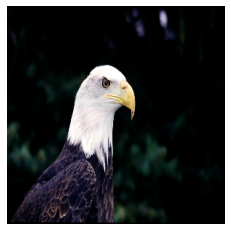

bald_eagle


In [13]:
# show one image here.
for img, label in dataset_train.take(1):
    print(img.shape)
    plt.imshow(img) 
    plt.axis('off') 
    plt.show()
    print(index_to_label[label.numpy()])


In [14]:
IMAGE_SIZE_CROPPED = 224
# parse training data
def map_fun(image, label):
    image = tf.reshape(image,[IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_DEPTH])
    # remove transpost
    image = tf.divide(tf.cast(image, tf.float32), 255.0)
    #label = tf.one_hot(label,10)
    distorted_image = tf.image.random_crop(image, [IMAGE_SIZE_CROPPED, IMAGE_SIZE_CROPPED, 3])
    distorted_image = tf.image.random_flip_left_right(distorted_image)
    distorted_image = tf.image.random_brightness(distorted_image, max_delta=63)
    distorted_image = tf.image.random_contrast(
        distorted_image, lower=0.2, upper=1.8)
    distorted_image = tf.image.per_image_standardization(distorted_image)
    return distorted_image, label

# parse testing data
def map_fun_test(image,label):
    image = tf.reshape(image,[IMAGE_HEIGHT,IMAGE_WIDTH, IMAGE_DEPTH])
    image = tf.divide(tf.cast(image, tf.float32), 255.0)
    #label = tf.one_hot(label,10)
    distorted_image = tf.image.resize_with_crop_or_pad(image, IMAGE_SIZE_CROPPED,IMAGE_SIZE_CROPPED)
    distorted_image = tf.image.per_image_standardization(distorted_image)
    return distorted_image, label


dataset_train = dataset_train.map(map_fun)
dataset_train = dataset_train.shuffle(BUFFER_SIZE)
dataset_train = dataset_train.batch(BATCH_SIZE)

# # Construct testing Dataset
dataset_val = dataset_val.map(map_fun_test)
dataset_val = dataset_val.batch(BATCH_SIZE)

In [15]:
for img, label in dataset_val.take(1):
    print(img.shape)
    print(label.shape)

(16, 224, 224, 3)
(16,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)


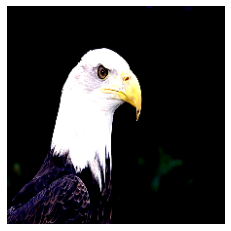

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0
(224, 224, 3)


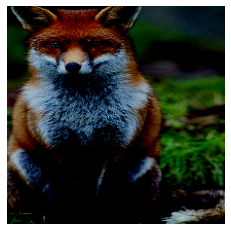

7


In [16]:
# show one image here.
for img, label in dataset_val.take(2):
    print(img[0].shape)
    plt.imshow(img[0]) 
    plt.axis('off') 
    plt.show()
    print(label[0].numpy())
    #print(index_to_label[label[0].numpy()])

In [17]:
dataset_train

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>

In [18]:
dataset_val

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>

In [19]:
base_model = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    pooling=None,
)
for layer in base_model.layers:
    layer.trainable = False

top_model = models.Sequential()
top_model.add(layers.Flatten())
top_model.add(layers.Dense(2048, activation='relu'))
top_model.add(layers.Dropout(0.5))
top_model.add(layers.Dense(1024, activation='relu'))
top_model.add(layers.Dropout(0.5))
top_model.add(layers.Dense(n_classes, activation='softmax'))

wild_model = tf.keras.Model(inputs=base_model.input, outputs=top_model(base_model.output)) 


In [20]:
wild_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [21]:
wild_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

wild_model.fit(dataset_train, validation_data=dataset_val, epochs=5)


Epoch 1/5
359/359 [==============================] - 73s 202ms/step - loss: 2.6551 - accuracy: 0.3343 - val_loss: 1.0792 - val_accuracy: 0.6842
Epoch 2/5
359/359 [==============================] - 72s 201ms/step - loss: 1.5821 - accuracy: 0.4486 - val_loss: 0.8004 - val_accuracy: 0.7592
Epoch 3/5
359/359 [==============================] - 72s 202ms/step - loss: 1.4400 - accuracy: 0.4986 - val_loss: 0.6930 - val_accuracy: 0.8113
Epoch 4/5
359/359 [==============================] - 73s 202ms/step - loss: 1.3548 - accuracy: 0.5368 - val_loss: 0.5596 - val_accuracy: 0.8214
Epoch 5/5
359/359 [==============================] - 73s 203ms/step - loss: 1.2348 - accuracy: 0.5802 - val_loss: 0.5198 - val_accuracy: 0.8619


In [22]:
_, test_acc_1 = wild_model.evaluate(dataset_val, verbose=0)
print('Testing Accuracy : %.4f'%test_acc_1)

Testing Accuracy : 0.8619


# Reference of homework
[用 tf.data 加载图片](https://tensorflow.google.cn/tutorials/load_data/images?hl=zh-cn)

[tf.io.serialize_tensor](https://www.tensorflow.org/api_docs/python/tf/io/serialize_tensor)
